In [6]:
# Part of this code has been solved with the help of ChatGPT. 
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve

# Defining the predefined values.
A = np.array([[13, 5], [5, 7]])
b = np.array([1, 1])
c = 2

# Define the objective function f(x)
def f(x):
    return x.T @ A @ x + b.T @ x + c

# Define the constraints g(x) = 0 and h(x) = 0
def g(x):
    return 2 * x[0] - 5 * x[1] - 2

def h(x):
    return x[0] + x[1] - 1


# Defining constraint: Here I am extracting the values from g(x) and h(x) to fit the format for the lagrangian.
A_matrix = np.array([[2, -5], [1, 1]])
b_vector = np.array([2, 1])

In [7]:
# Defining the coefficient matrix
coefficient_matrix = np.array([
    [2*A[0, 0], 2*A[0, 1], 2, 1],
    [2*A[1, 0], 2*A[1, 1], -5, 1],
    [A_matrix[0, 0], A_matrix[0, 1], 0, 0],
    [A_matrix[1, 0], A_matrix[1, 1], 0, 0]
])

# Defining the constant vector
constant_vector = np.array([-b[0], -b[1], b_vector[0], b_vector[1]])

In [8]:
# Finding the optimal point
solution = solve(coefficient_matrix, constant_vector)
optimal_point = solution[:2]

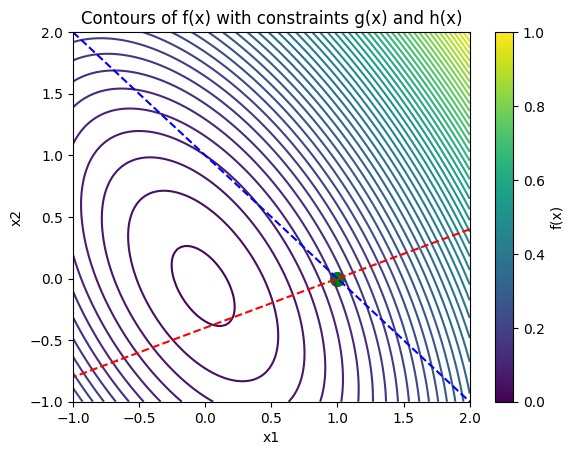

In [9]:
# Plotting all the graphs in one plot
x1_vals = np.linspace(-1, 2, 100)
x2_vals = np.linspace(-1, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F_vals = np.array([[f(np.array([x1, x2])) for x1 in x1_vals] for x2 in x2_vals])
G_vals = np.array([[g(np.array([x1, x2])) for x1 in x1_vals] for x2 in x2_vals])
H_vals = np.array([[h(np.array([x1, x2])) for x1 in x1_vals] for x2 in x2_vals])

plt.contour(X1, X2, F_vals, levels=50, cmap='viridis')
plt.contour(X1, X2, G_vals, levels=[0], colors='red', linestyles='dashed')
plt.contour(X1, X2, H_vals, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(optimal_point[0], optimal_point[1], color='green', s=100)
plt.title('Contours of f(x) with constraints g(x) and h(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='f(x)')
plt.show()

In [10]:
print("Optimal point:", optimal_point)

Optimal point: [ 1.00000000e+00 -1.74944234e-16]
